<a href="https://colab.research.google.com/github/fcoliveira-utfpr/agrometeorologia/blob/main/02_climogramas_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Início - Bibliotecas**
---

In [ ]:
#importando bibliotecas
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import json
import requests
import os
import openpyxl
from google.colab import files
import matplotlib.pyplot as plt

# **Gráfico climograma**
---

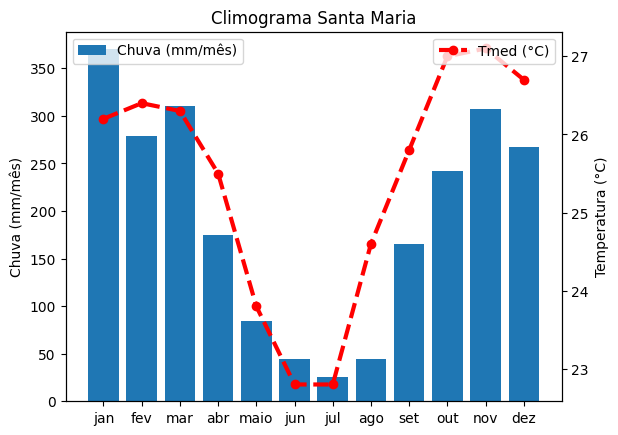

In [ ]:
municipio = "Santa Maria" ###### Nome aqui entre aspas

estado = "RS" ###### Sigla do estado entre aspas

# ============================================================
# Carrega base climática local
# ============================================================
url_1 = "https://raw.githubusercontent.com/fcoliveira-utfpr/agrometeorologia/refs/heads/main/clima_solo_local.csv"
df1 = pd.read_csv(url_1)

# Separa colunas categóricas
cidade = df1['Município']
uf = df1['Estado']
regiao = df1['Região']
koppen = df1['Köppen']

# Converte valores com vírgula para ponto e numérico
df1_valores = df1.drop(columns=['Município', 'Estado','Região','Köppen'])
df1_valores = df1_valores.replace({',': '.'}, regex=True)
df1_valores = df1_valores.apply(pd.to_numeric, errors='coerce')

# Reconstrói o df
df1 = df1_valores.copy()
df1['Município'] = cidade
df1['Estado'] = uf
df1['Região'] = regiao
df1['Köppen'] = koppen

# Filtra município e estado
df11 = df1[(df1['Município'] == municipio) & (df1['Estado'] == estado)].copy()

meses = ["jan","fev","mar","abr","maio","jun","jul","ago","set","out","nov","dez"]

temp = [df1[f"T_{m}"].values[0] for m in meses]
chuva = [df1[f"Chuva_{m}"].values[0] for m in meses]

meses = ["jan","fev","mar","abr","maio","jun","jul","ago","set","out","nov","dez"]

fig, ax1 = plt.subplots()

# barras da chuva
ax1.bar(meses, chuva, label='Chuva (mm/mês)')
ax1.set_ylabel("Chuva (mm/mês)")

# eixo secundário para Tmin
ax2 = ax1.twinx()
ax2.plot(
    meses,
    temp,
    label='Tmed (°C)',
    marker='o',
    markersize=6,
    color='red',
    linestyle='--',
    linewidth=3
)
ax2.set_ylabel("Temperatura (°C)")

# legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title(f'Climograma {municipio}')
plt.show()

## Dados Climograma
---

In [ ]:
#Visualizar dados e baixar
df6 = pd.DataFrame(
    {
        "Mês": meses,
        "Temperatura média (°C)": temp,
        "Chuva (mm/mês)": chuva
    }
)
df6["Município"] = municipio

tiempo = 'dados_climograma'

#para baixar os dados tire o # da última linha
from google.colab import files
df6.to_excel(f'{municipio}_{tiempo}.xlsx')
#files.download(f'{municipio}_{tiempo}.xlsx')

df6

,Mês,Temperatura média (°C),Chuva (mm/mês),Município
0,jan,26.2,370,Santa Maria
1,fev,26.4,279,Santa Maria
2,mar,26.3,310,Santa Maria
3,abr,25.5,175,Santa Maria
4,maio,23.8,84,Santa Maria
5,jun,22.8,44,Santa Maria
6,jul,22.8,25,Santa Maria
7,ago,24.6,44,Santa Maria
8,set,25.8,165,Santa Maria
9,out,27.0,242,Santa Maria
